# Logistic Regression with PyTorch (on MNIST dataset)
By [Zahra Taheri](https://github.com/zata213), August 24, 2020

## Logistic Regression In-depth

**Predicting Probability**
In a binary classification problem, e.g., determining spam or not spam.

**Logistic function:** 

- $g(y)=\frac{1}{1+e^{-y}}=\frac{1}{1+e^{-(ax+b)}}$ estimated probability that $y=1$ given $x$.

**Softmax function:** 

- Multi-class Logistic regression
- Generalization of Logistic function
- Its output is the predicting probability

![alt text](logistic_reg_diagram.png)

### Cross entropy function (D)
![alt text](entropy.png)

### Cross entropy loss (L)

- $L = \frac{1}{N}\sum_i D(g(ax_i+b),L_i)$
- Goal: Minimizing Cross entropy loss

## Building a Logistic Regression model with PyTorch

![alt text](logistic_reg_diagram_general.png)

## Logistic Regression in PyTorch On CPU
### Classification based on the MNIST dataset

In [1]:
# import libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [2]:
# read MNIST dataset
train_dataset = datasets.MNIST(root='.\data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = datasets.MNIST(root='.\data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [3]:
type(train_dataset[0])

tuple

In [4]:
len(train_dataset)

60000

In [5]:
len(test_dataset)

10000

In [6]:
len(train_dataset[0])

2

In [7]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [8]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [9]:
train_dataset[0][1]

5

In [10]:
# display MNIST dataset

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [12]:
show_img = train_dataset[0][0].numpy().reshape(28,28)

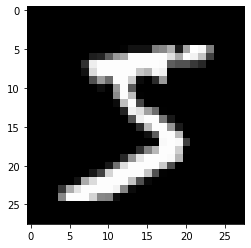

In [13]:
plt.imshow(show_img, cmap='gray')

In [14]:
train_dataset[0][1]

5

In [15]:
show_img = train_dataset[1][0].numpy().reshape(28,28)

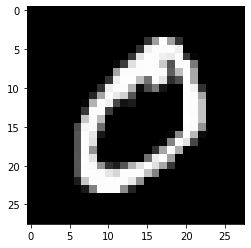

In [16]:
plt.imshow(show_img, cmap='gray')

In [17]:
train_dataset[1][1]

0

#### Make dataset iterable

- **total data**: 60000
- **mini-batch** (number of examples in 1 iteration): 100
- **iterations** (1 iteration means one mini-batch forward and backward pass): 3000
- **epochs** (1 epoch means running through the whole dataset once): $iterations\div \frac{total data}{mini-batch} = 3000\div \frac{60000}{100} = 5$

In [18]:
len(train_dataset)

60000

In [19]:
batch_size = 100

In [20]:
n_iters = 3000

In [21]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

In [22]:
# create iterable object :training dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [23]:
# check iterability

import collections.abc
isinstance(train_loader, collections.abc.Iterable)

True

In [24]:
# check iterability

isinstance(train_dataset, collections.abc.Iterable)

False

In [25]:
# create iterable object :testing dataset

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [26]:
# check iterability

isinstance(test_loader, collections.abc.Iterable)

True

In [27]:
# the meaning of iterate through dataset

img_1=np.ones((28,28))
img_2=np.ones((28,28))
list1=[img_1, img_2]
for i in list1:
    print(i.shape)

(28, 28)
(28, 28)


### Building a model 

In [28]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__() #to inherit every things from nn.Module
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out       

###  Instantiate model class

In [29]:
input_dim = 28*28 # size of image
output_dim = 10 # 0,1,2,3,...,9

model = LogisticRegressionModel(input_dim, output_dim)

###  Instantiate loss class
**Cross Entropy Loss:** `nn.CrossEntropyLoss()`, computes softmax(logistic/softmax function) and then computes Cross Entropy Loss

In [30]:
criterion=nn.CrossEntropyLoss()

###  Instantiate optimizer class

- Simplified equation for updating parameters is $\theta=\theta-\eta\cdot\nabla_\theta$, where $\theta$ is parameters (our variables), $\eta$ is learning rate (how fast we want the model to learn), and $\nabla_\theta$ is parameters' gradients.

- At every iteration, we update our model's parameters.

In [31]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [32]:
print(model.parameters())
print(len(list(model.parameters())))

# FC 1 parameters
print(list(model.parameters())[0].size())# A in equation Ax+b

# Bias parameters
print(list(model.parameters())[1].size())# b in equation Ax+b

<generator object Module.parameters at 0x000001C00E842890>
2
torch.Size([10, 784])
torch.Size([10])


![alt text](logistic_reg_diagram_mnist.png)

### Train the model
- **Process**
    1. Convert inputs\labels to variables
    2. Clear gradients buffels
    3. Get outputs given inputs
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
    7. REPEAT

In [33]:
iter = 0 # n_iter is from 0 to 3000
for epoch in range(num_epochs): #num_epochs is 5
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28)) # number of images in each iteration is equal to batch_size=100
        labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        # 100x10 
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28*28))
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                #100x1
                _, predicted = torch.max(outputs.data, 1) # torch.size(100, 1) containing largest predictions for each image
                
                # Total number of labels
                total += labels.size(0)
           
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct // total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))

Iteration: 500. Loss: 1.8096678256988525. Accuracy: 67
Iteration: 1000. Loss: 1.5189476013183594. Accuracy: 75
Iteration: 1500. Loss: 1.3287724256515503. Accuracy: 79
Iteration: 2000. Loss: 1.1829860210418701. Accuracy: 81
Iteration: 2500. Loss: 1.0597482919692993. Accuracy: 82
Iteration: 3000. Loss: 1.0382152795791626. Accuracy: 82


In [34]:
save_model = False
if save_model is True:
    torch.save(model.state_dict(), 'logistic_reg_pytorch_mnist.pkl')# only save parameters

## Logistic Regression From CPU to GPU in PyTorch
Two things must be up to the GPU:
- models
- Variables

In [35]:
# import libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [36]:
# read MNIST dataset
train_dataset = datasets.MNIST(root='.\data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = datasets.MNIST(root='.\data', 
                           train=False, 
                           transform=transforms.ToTensor())

#### Make dataset iterable

- **total data**: 60000
- **mini-batch** (number of examples in 1 iteration): 100
- **iterations** (1 iteration means one mini-batch forward and backward pass): 3000
- **epochs** (1 epoch means running through the whole dataset once): $iterations\div \frac{total data}{mini-batch} = 3000\div \frac{60000}{100} = 5$

In [37]:
batch_size = 100

In [38]:
n_iters = 3000

In [39]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

In [40]:
# create iterable object :training dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

# create iterable object :testing dataset

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

### Building a model 

In [41]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__() #to inherit every things from nn.Module
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out       

###  Instantiate model class

In [42]:
input_dim = 28*28 # size of image
output_dim = 10 # 0,1,2,3,...,9

model = LogisticRegressionModel(input_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################

if torch.cuda.is_available():
    model.cuda()

###  Instantiate loss class

In [43]:
criterion=nn.CrossEntropyLoss()

###  Instantiate optimizer class

In [44]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

### Train the model

In [45]:
iter = 0 # n_iter is from 0 to 3000
for epoch in range(num_epochs): #num_epochs is 5
    for i, (images, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 28*28).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
        
       # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        # 100x10 
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 28*28).cuda())
                else:
                    images = Variable(images.view(-1, 28*28))             
                  
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                #100x1
                _, predicted = torch.max(outputs.data, 1) # torch.size(100, 1) containing largest predictions for each image
                
                # Total number of labels
                total += labels.size(0)
           
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:                
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct // total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))

Iteration: 500. Loss: 1.8388488292694092. Accuracy: 68
Iteration: 1000. Loss: 1.5717060565948486. Accuracy: 76
Iteration: 1500. Loss: 1.3906669616699219. Accuracy: 79
Iteration: 2000. Loss: 1.2996100187301636. Accuracy: 81
Iteration: 2500. Loss: 1.1234233379364014. Accuracy: 82
Iteration: 3000. Loss: 1.0836905241012573. Accuracy: 82
